In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ai21ds06anilriswal","key":"53df787d8738133b15e8e26a7fc019a5"}'}

In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
!mv /correct/path/to/kaggle.json /root/.kaggle/


mv: cannot stat '/correct/path/to/kaggle.json': No such file or directory


In [13]:
!ls /path/to/

ls: cannot access '/path/to/': No such file or directory


In [14]:
!mv /correct/path/to/kaggle.json /root/.kaggle/


mv: cannot stat '/correct/path/to/kaggle.json': No such file or directory


In [17]:



!cd /path/to/
!ls


/bin/bash: line 1: cd: /path/to/: No such file or directory
 drive	'kaggle (1).json'   sample_data


In [18]:
!mv 'kaggle (1).json' /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ckay16/accident-detection-from-cctv-footage

In [ ]:
!unzip /content/accident-detection-from-cctv-footage.zip -d /content/drive/MyDrive

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset1/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset1/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset1/valid',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 1133 files belonging to 4 classes.
Found 373 files belonging to 4 classes.
Found 374 files belonging to 4 classes.


In [ ]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.VGG16(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 5)

Epoch 1/5
36/36 [==============================] - 139s 4s/step - loss: 1.2646 - accuracy: 0.6567 - val_loss: 1.0934 - val_accuracy: 0.6230
Epoch 2/5
36/36 [==============================] - 11s 322ms/step - loss: 0.5568 - accuracy: 0.7793 - val_loss: 0.9507 - val_accuracy: 0.6765
Epoch 3/5
36/36 [==============================] - 13s 355ms/step - loss: 0.4687 - accuracy: 0.8191 - val_loss: 0.9891 - val_accuracy: 0.6711
Epoch 4/5
36/36 [==============================] - 13s 371ms/step - loss: 0.4338 - accuracy: 0.8350 - val_loss: 1.1632 - val_accuracy: 0.6872
Epoch 5/5
36/36 [==============================] - 15s 420ms/step - loss: 0.4280 - accuracy: 0.8411 - val_loss: 0.9598 - val_accuracy: 0.6925


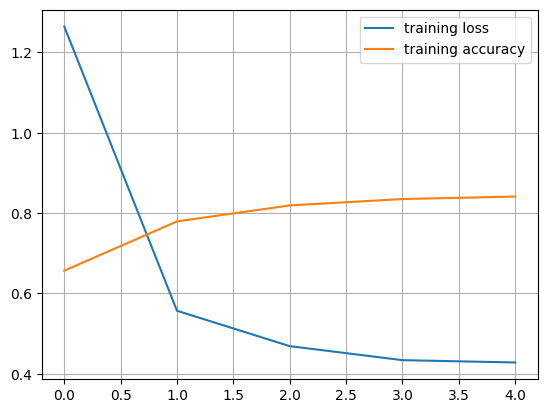

In [ ]:
#Training Accuracy and Traingin Loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

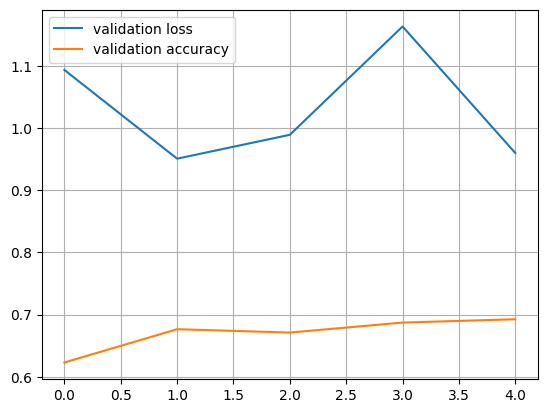

In [ ]:
#Validation Accuracy and Validation Loss
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

1/1 [==============================] - 0s 246ms/step


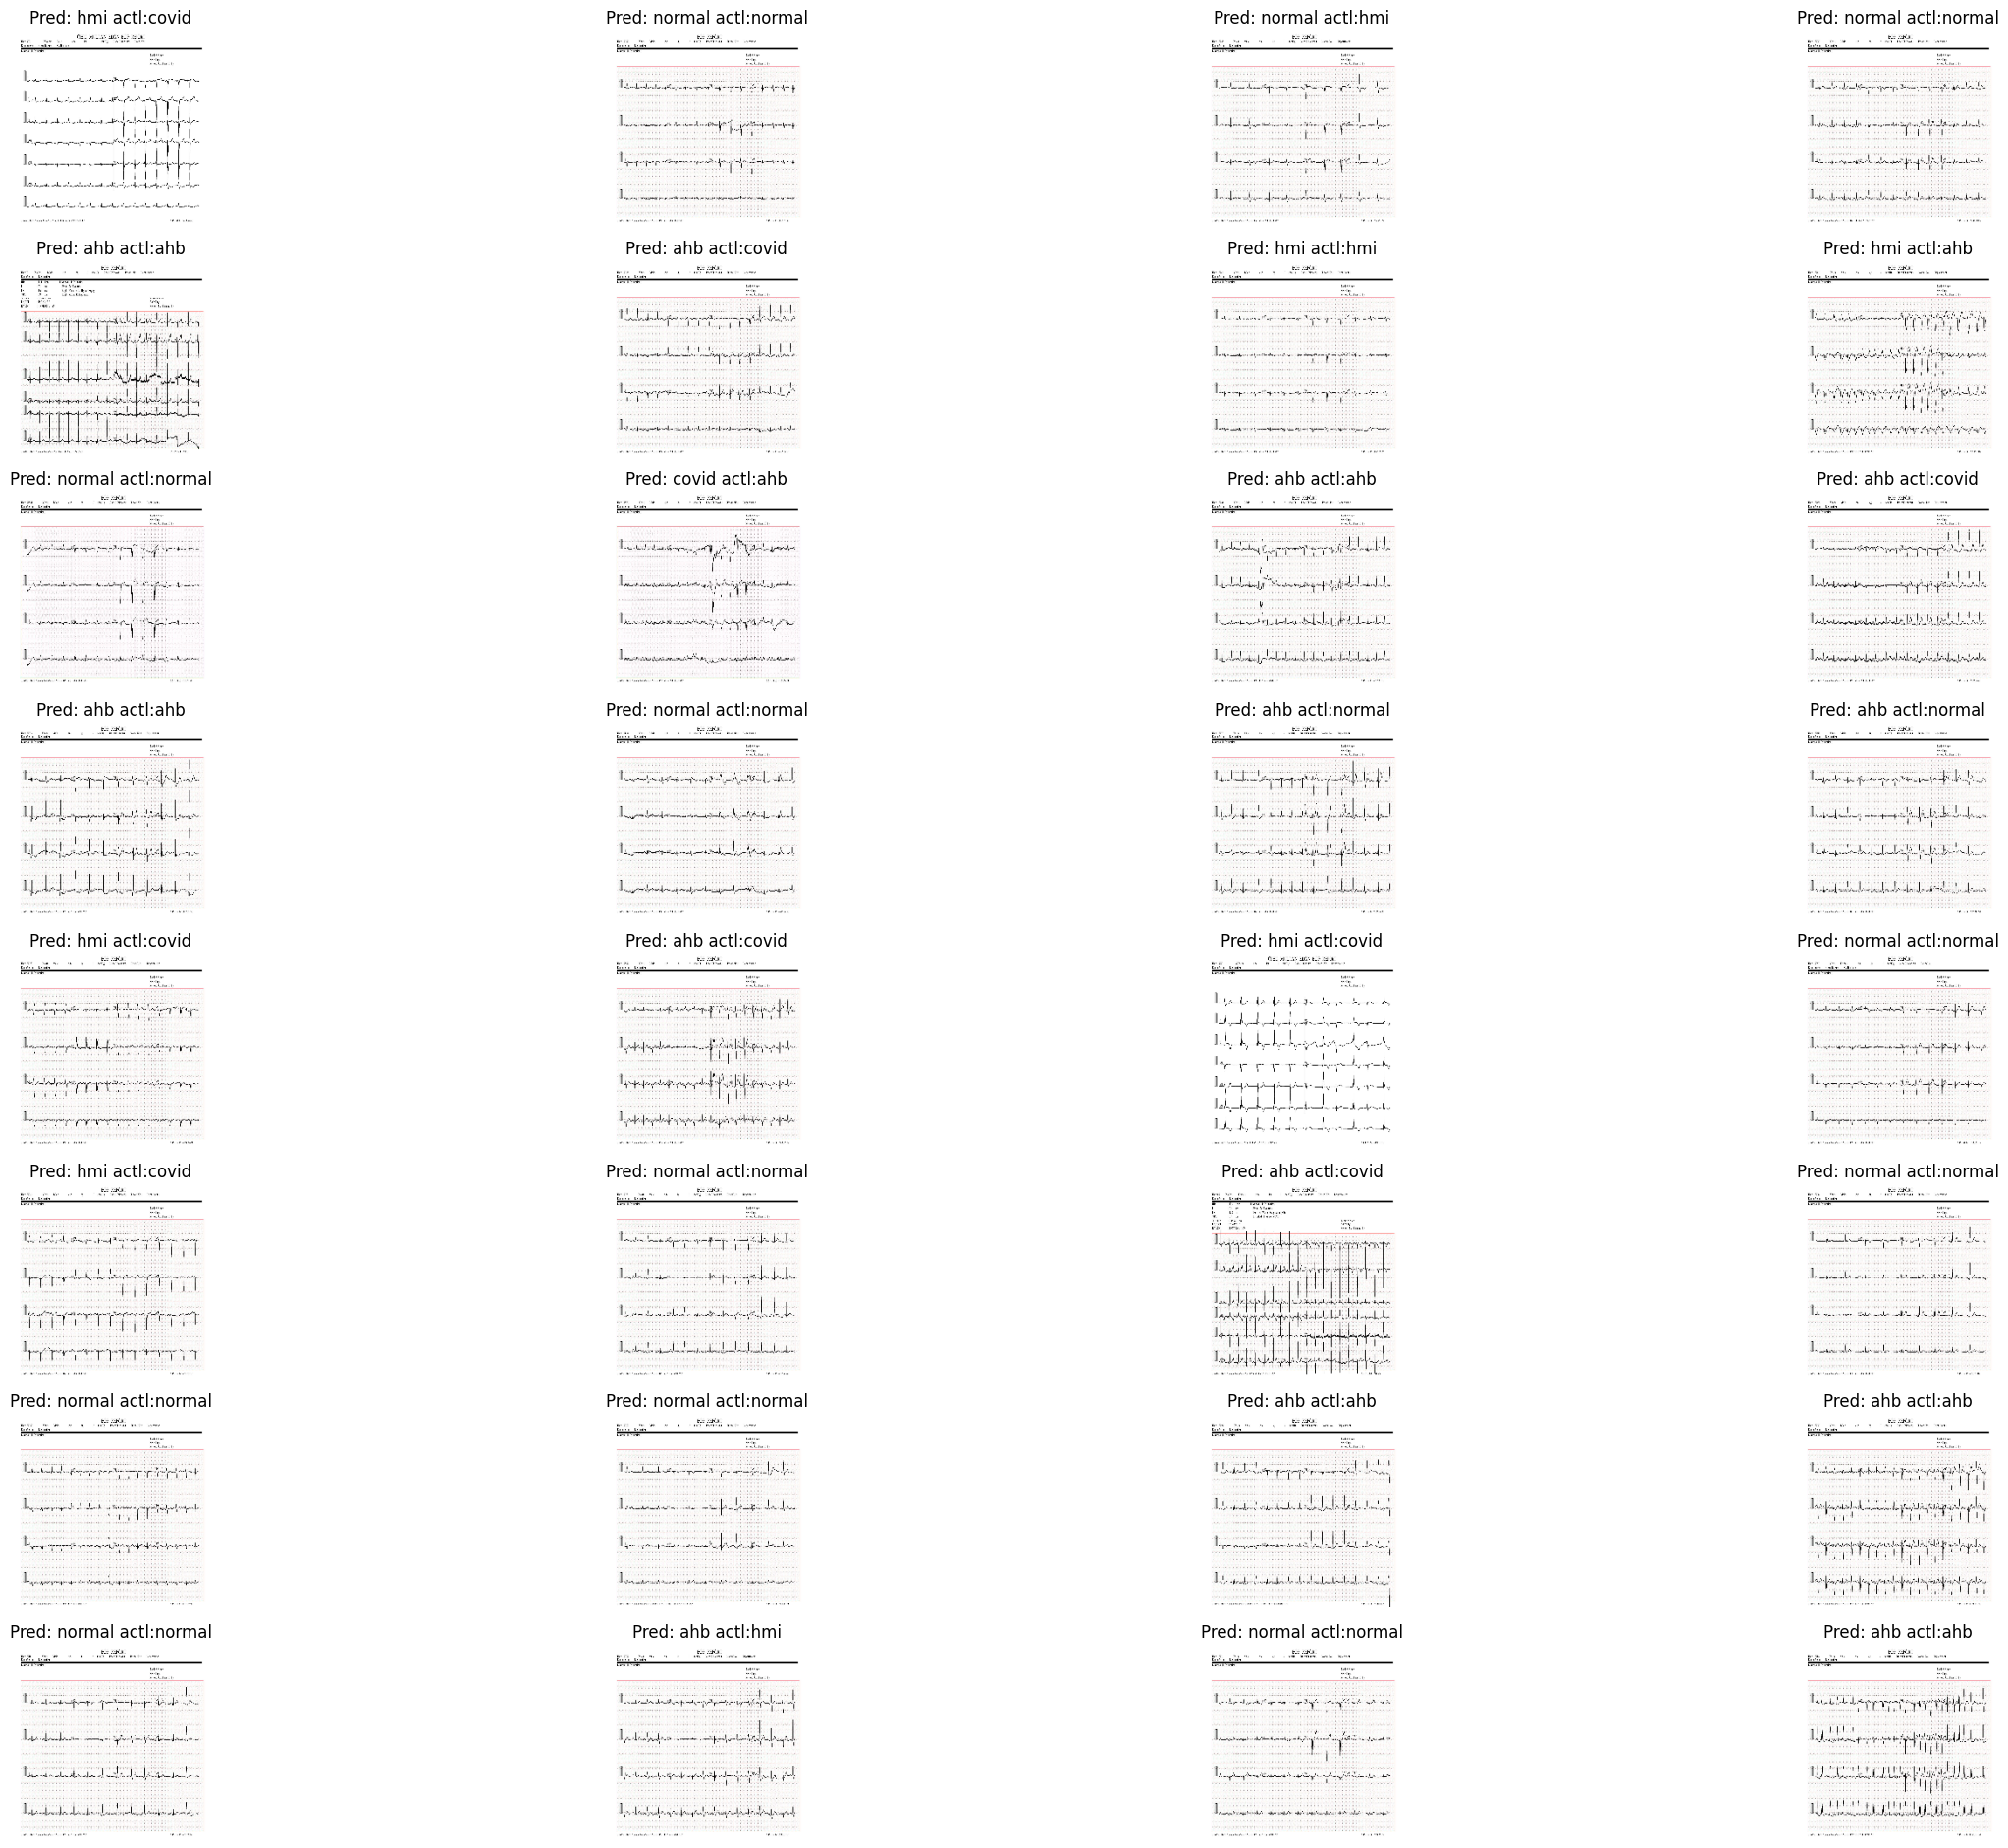

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    num_images = images.shape[0]
    for i in range(num_images):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/data/model1.h5")

1/1 [==============================] - 1s 976ms/step


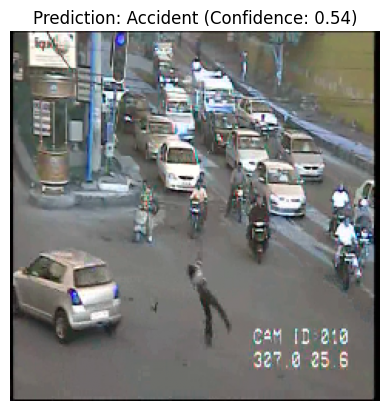

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/data/model.h5")

# Define the class labels
class_names = ['Non Accident', 'Accident']

# Load and preprocess the image
image_path = "/content/drive/MyDrive/data/val/Accident/acc1 (4).jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (240, 240))  # Resize the image to match the input size of the model
image = image / 255.0  # Normalize the pixel values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add an extra dimension to represent the batch

# Perform the prediction
predictions = model.predict(image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]

# Plot the image with the predicted label
plt.imshow(image[0])
plt.title('Prediction: {} (Confidence: {:.2f})'.format(predicted_class, confidence))
plt.axis('off')
plt.show()
